In [20]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv("genz.csv")

In [25]:
data.head()

,User_ID,Age,Gender,Location,Education,Occupation,Primary_App,Secondary_Apps,Usage_Frequency,Daily_Usage_Time,Reason_for_Using,Satisfaction,Challenges,Desired_Features,Preferred_Communication,Partner_Priorities
0,1,20,Non-binary,Bangalore,Undergraduate,Freelancer,Hinge,Hinge,Monthly,1 hour,Finding a Partner,4,Safety Concerns,Audio Calls,Video Calls,Values > Personality > Appearance
1,2,24,Female,Delhi,Undergraduate,Part-time Job,Hinge,OkCupid,Weekly,30 minutes,Casual Dating,5,Time-Wasting,Video Calls,Text,Values > Personality > Appearance
2,3,24,Non-binary,Kolkata,Undergraduate,Intern,NaN,NaN,Weekly,2 hours,Casual Dating,4,Safety Concerns,Detailed Profiles,Text,Values > Personality > Appearance
3,4,22,Non-binary,Delhi,Graduate,Full-time Job,NaN,OkCupid,Daily,30 minutes,Casual Fun,3,NaN,AI Recommendations,Voice Notes,Personality > Interests > Values
4,5,18,Male,Delhi,Graduate,Intern,OkCupid,OkCupid,Weekly,2 hours,Casual Fun,4,Safety Concerns,Video Calls,Text,Appearance > Interests > Personality


In [26]:
duplicates = data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [27]:
missing_values = data.isnull().sum()
print("The missing values per column:\n", missing_values)

The missing values per column:
 User_ID                      0
Age                          0
Gender                       0
Location                     0
Education                    0
Occupation                   0
Primary_App                107
Secondary_Apps             114
Usage_Frequency              0
Daily_Usage_Time             0
Reason_for_Using             0
Satisfaction                 0
Challenges                 117
Desired_Features             0
Preferred_Communication      0
Partner_Priorities           0
dtype: int64


In [28]:
version_1 = pd.DataFrame(data)

In [29]:
version_1.head()

,User_ID,Age,Gender,Location,Education,Occupation,Primary_App,Secondary_Apps,Usage_Frequency,Daily_Usage_Time,Reason_for_Using,Satisfaction,Challenges,Desired_Features,Preferred_Communication,Partner_Priorities
0,1,20,Non-binary,Bangalore,Undergraduate,Freelancer,Hinge,Hinge,Monthly,1 hour,Finding a Partner,4,Safety Concerns,Audio Calls,Video Calls,Values > Personality > Appearance
1,2,24,Female,Delhi,Undergraduate,Part-time Job,Hinge,OkCupid,Weekly,30 minutes,Casual Dating,5,Time-Wasting,Video Calls,Text,Values > Personality > Appearance
2,3,24,Non-binary,Kolkata,Undergraduate,Intern,NaN,NaN,Weekly,2 hours,Casual Dating,4,Safety Concerns,Detailed Profiles,Text,Values > Personality > Appearance
3,4,22,Non-binary,Delhi,Graduate,Full-time Job,NaN,OkCupid,Daily,30 minutes,Casual Fun,3,NaN,AI Recommendations,Voice Notes,Personality > Interests > Values
4,5,18,Male,Delhi,Graduate,Intern,OkCupid,OkCupid,Weekly,2 hours,Casual Fun,4,Safety Concerns,Video Calls,Text,Appearance > Interests > Personality


In [30]:
version_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User_ID                  500 non-null    int64 
 1   Age                      500 non-null    int64 
 2   Gender                   500 non-null    object
 3   Location                 500 non-null    object
 4   Education                500 non-null    object
 5   Occupation               500 non-null    object
 6   Primary_App              393 non-null    object
 7   Secondary_Apps           386 non-null    object
 8   Usage_Frequency          500 non-null    object
 9   Daily_Usage_Time         500 non-null    object
 10  Reason_for_Using         500 non-null    object
 11  Satisfaction             500 non-null    int64 
 12  Challenges               383 non-null    object
 13  Desired_Features         500 non-null    object
 14  Preferred_Communication  500 non-null    o

In [31]:
version_1[version_1.select_dtypes(include='object').columns] = version_1.select_dtypes(include='object').astype('category')

In [32]:
version_1["Primary_App"] = version_1["Primary_App"].fillna(version_1["Primary_App"].mode())

In [33]:
version_1["Secondary_Apps"] = version_1["Secondary_Apps"].fillna(version_1["Secondary_Apps"].mode())
version_1["Challenges"] = version_1["Challenges"].fillna(version_1["Challenges"].mode())

In [34]:
version_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   User_ID                  500 non-null    int64   
 1   Age                      500 non-null    int64   
 2   Gender                   500 non-null    category
 3   Location                 500 non-null    category
 4   Education                500 non-null    category
 5   Occupation               500 non-null    category
 6   Primary_App              393 non-null    category
 7   Secondary_Apps           386 non-null    category
 8   Usage_Frequency          500 non-null    category
 9   Daily_Usage_Time         500 non-null    category
 10  Reason_for_Using         500 non-null    category
 11  Satisfaction             500 non-null    int64   
 12  Challenges               383 non-null    category
 13  Desired_Features         500 non-null    category
 14  Preferred_

In [35]:
missing_values = version_1.isnull().sum()
print("The missing values per column:\n", missing_values)

The missing values per column:
 User_ID                      0
Age                          0
Gender                       0
Location                     0
Education                    0
Occupation                   0
Primary_App                107
Secondary_Apps             114
Usage_Frequency              0
Daily_Usage_Time             0
Reason_for_Using             0
Satisfaction                 0
Challenges                 117
Desired_Features             0
Preferred_Communication      0
Partner_Priorities           0
dtype: int64


In [36]:
version_1["Primary_App"] = version_1["Primary_App"].fillna(version_1["Primary_App"].mode()[0])
version_1["Secondary_Apps"] = version_1["Secondary_Apps"].fillna(version_1["Secondary_Apps"].mode()[0])
version_1["Challenges"] = version_1["Challenges"].fillna(version_1["Challenges"].mode()[0])

In [37]:
missing_values = version_1.isnull().sum()
print("The missing values per column:\n", missing_values)

The missing values per column:
 User_ID                    0
Age                        0
Gender                     0
Location                   0
Education                  0
Occupation                 0
Primary_App                0
Secondary_Apps             0
Usage_Frequency            0
Daily_Usage_Time           0
Reason_for_Using           0
Satisfaction               0
Challenges                 0
Desired_Features           0
Preferred_Communication    0
Partner_Priorities         0
dtype: int64


In [38]:
version_1['Gender'] = version_1['Gender'].str.lower()
print(version_1)

     User_ID  Age      Gender   Location      Education     Occupation  \
0          1   20  non-binary  Bangalore  Undergraduate     Freelancer   
1          2   24      female      Delhi  Undergraduate  Part-time Job   
2          3   24  non-binary    Kolkata  Undergraduate         Intern   
3          4   22  non-binary      Delhi       Graduate  Full-time Job   
4          5   18        male      Delhi       Graduate         Intern   
..       ...  ...         ...        ...            ...            ...   
495      496   23      female     Mumbai  Undergraduate         Intern   
496      497   23        male     Mumbai   Postgraduate         Intern   
497      498   22        male  Hyderabad       Graduate     Freelancer   
498      499   21      female    Kolkata       Graduate        Student   
499      500   22        male     Mumbai       Graduate  Part-time Job   

    Primary_App Secondary_Apps Usage_Frequency Daily_Usage_Time  \
0         Hinge          Hinge         Month

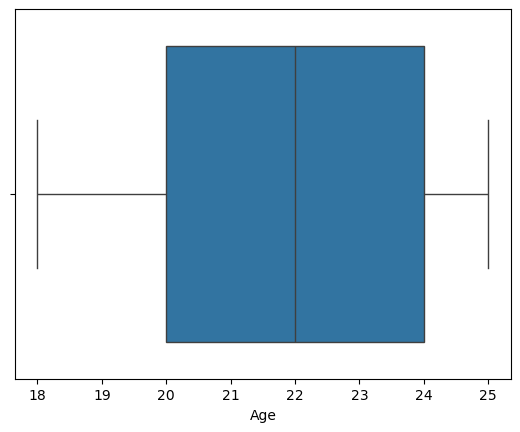

In [39]:
# Box plot for visualizing outliers
sns.boxplot(x=version_1['Age'])
plt.show()

In [47]:
version_1["Satisfaction"]= version_1["Satisfaction"].astype('category')

          User_ID       Age
User_ID  1.000000  0.075403
Age      0.075403  1.000000


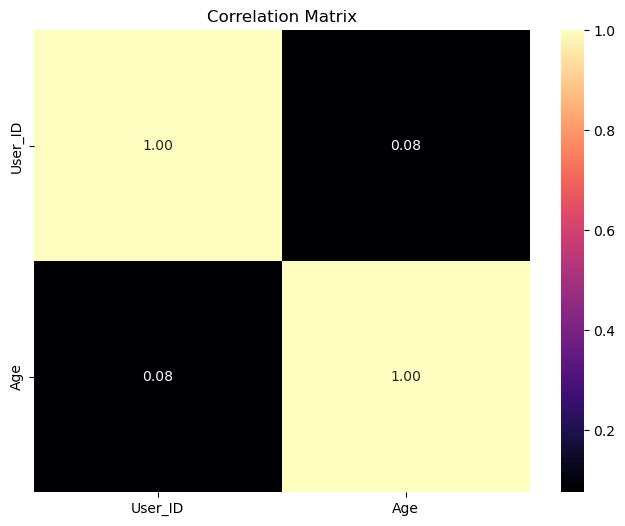

In [60]:
corr_matrix = version_1.corr(numeric_only='True')

# Display the correlation matrix
print(corr_matrix)

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [61]:
pivot_table = version_1.pivot_table(
    index="Gender", 
    columns="Location", 
    values="Age", 
    aggfunc=["mean"], 
    observed=False
)
print(pivot_table)

                 mean                                                         \
Location    Bangalore    Chennai      Delhi  Hyderabad    Kolkata     Mumbai   
Gender                                                                         
female      20.882353  20.304348  22.333333  21.111111  21.423077  21.000000   
male        21.903226  21.882353  21.538462  21.952381  21.518519  21.363636   
non-binary  21.809524  21.730769  22.600000  21.840000  20.913043  21.611111   

                       
Location         Pune  
Gender                 
female      21.354839  
male        22.437500  
non-binary  22.050000  


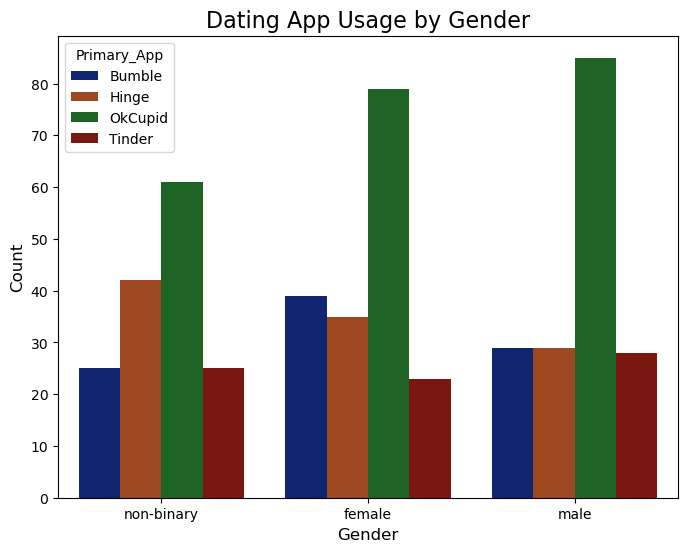

In [67]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Primary_App', data=version_1, palette='dark')

plt.title('Dating App Usage by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

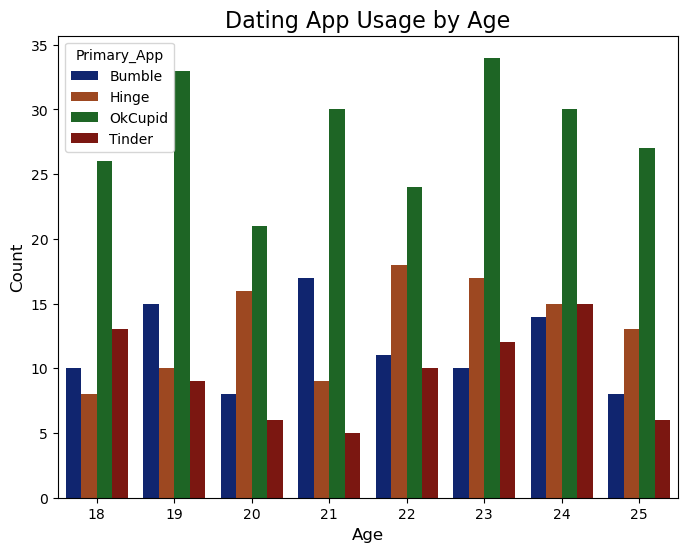

In [71]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Age', hue='Primary_App', data=version_1, palette='dark')

plt.title('Dating App Usage by Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

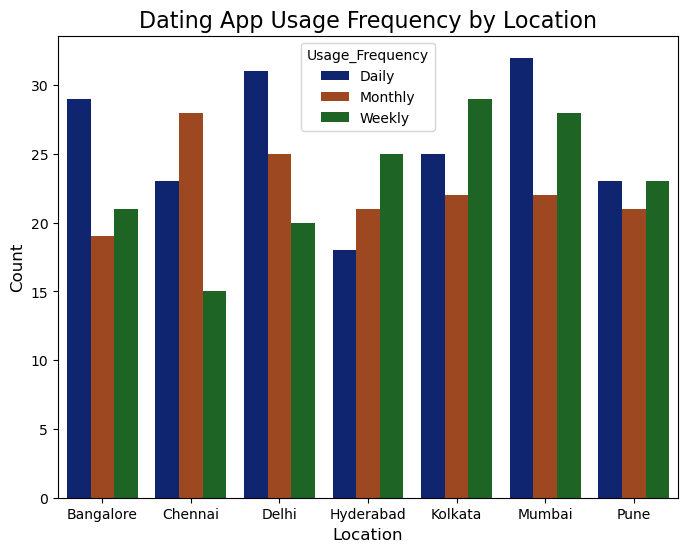

In [72]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Location', hue='Usage_Frequency', data=version_1, palette='dark')

plt.title('Dating App Usage Frequency by Location', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_19872\1717479702.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_app_count = version_1.groupby(['Age', 'Primary_App']).size().reset_index(name='Count')


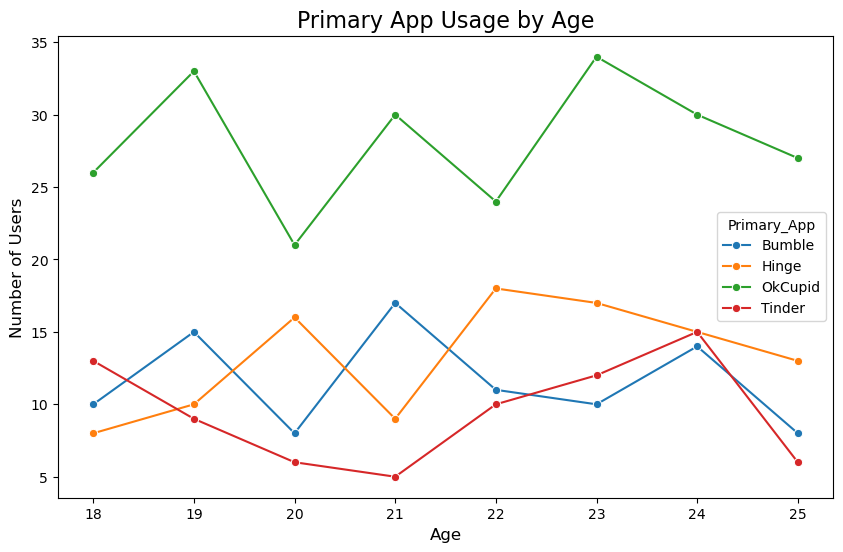

In [76]:
age_app_count = version_1.groupby(['Age', 'Primary_App']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.lineplot(data=age_app_count, x='Age', y='Count', hue='Primary_App', marker='o', palette='tab10')
plt.title('Primary App Usage by Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.show()
observed=False
